## **1. Data Exploration**

ในการทำการบ้านครั้งนี้ทางกลุ่มเราเลือกใช้ dataset ของ bank-full.csv

โดยการทำครั้งนี้จะทำการสร้าง modle มา 3 ประเภทได้แก่ Dicision Tree , KNN และ Neural network แล้วทำการเปรียบเทียบว่า modle ใดมีความเหมาะสมกับ Dataset ชุดนี้มากที่สุด โดยทางธนาคารมีเป้าหมายให้คือ ต้องการสร้าง model ที่จะมาคาดการณ์ว่า ลูกค้ารายนั่นๆจะสมัครเป็นลูกค้าเงินฝากประจำหรือไม่

ดังนั้นทางกลุ่มเราจึงมองว่าข้อมูลที่จะนำมาใช้เปรียบเทียบทั้ง 3 modle คือ ค่า recall ของคนที่ตอบตกลงสมัครเป็นลูกค้าเงินฝากประจำ เพราะยิ่งค่า recall ของคนตอบตกลงของ modle นั้นๆมีค่าที่สูง ก็แปลว่า modle นั้นมีความสามารถในการดึงข้อมูลของคนที่ตอบตกลงออกมาได้สูง ช่วยให้ธนาคารไม่สูญเสียลูกค้าที่ตอบตกลงไปนั้นเอง
    


In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv('bank/bank-full.csv',header = 0, sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


ตรวจสอบหาจำนวนข้อมูลที่เป็น missing value ของข้อมูลทั้งหมด

In [128]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

ดูข้อมูลว่ามีข้อมูลทั้งหมดกี่แถวกี่คอลัมน์เพื่อตรวจสอบหาจำนวนข้อมูลและจำนวน feature ในข้อมูล

In [129]:
df.shape


(45211, 17)

ตรวจสอบชนิดของข้อมูล

In [130]:

df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

ทำการแยก feature ตามชนิดข้อมูลโดย feature ที่เป็นตัวเลขจะเก็บไว้ในตัวแปร Num_df และ feature ที่เป็นตัวอักษรจะเก็บไว้ในตัวแปร Cat_df

In [131]:

Cat_df = df.select_dtypes(include=['object'])
Num_df = df.select_dtypes(include=['int64'])
print("caterical is " + str(Cat_df.shape))
print("Numurical is " + str(Num_df.shape))

caterical is (45211, 10)
Numurical is (45211, 7)


ทำการตรวจสอบข้อมูลของ feature output ซึ่งพบว่ามีข้อมูลของคนตอบ yes น้อยกว่า no มาก

In [132]:

df['y'].value_counts()


no     39922
yes     5289
Name: y, dtype: int64

In [133]:
#sns.pairplot(df, hue="y")

สร้างกราฟเพื่อดูในแต่ละ feature ที่เป็น categorical มีความสัมพันธ์กับค่า y อย่างไร

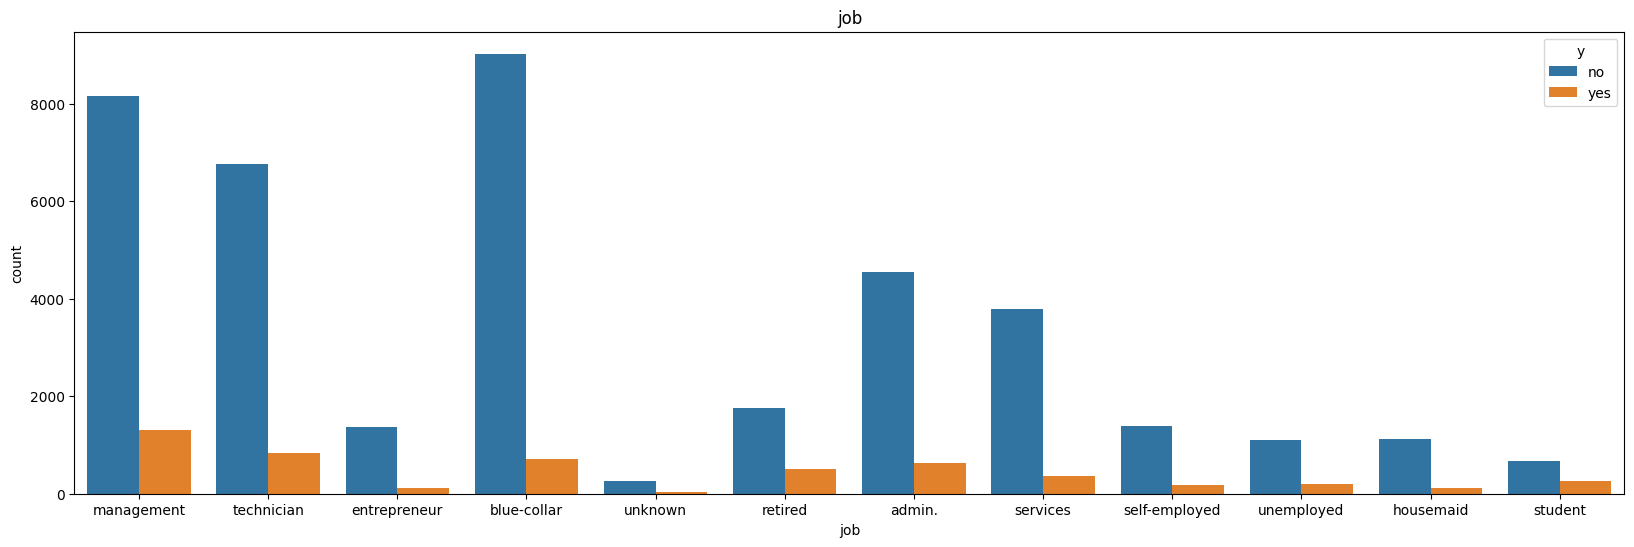

----------------------------------------------
yes rate is 
 admin.           0.122027
blue-collar      0.072750
entrepreneur     0.082717
housemaid        0.087903
management       0.137556
retired          0.227915
self-employed    0.118429
services         0.088830
student          0.286780
technician       0.110570
unemployed       0.155027
unknown          0.118056
Name: job, dtype: float64


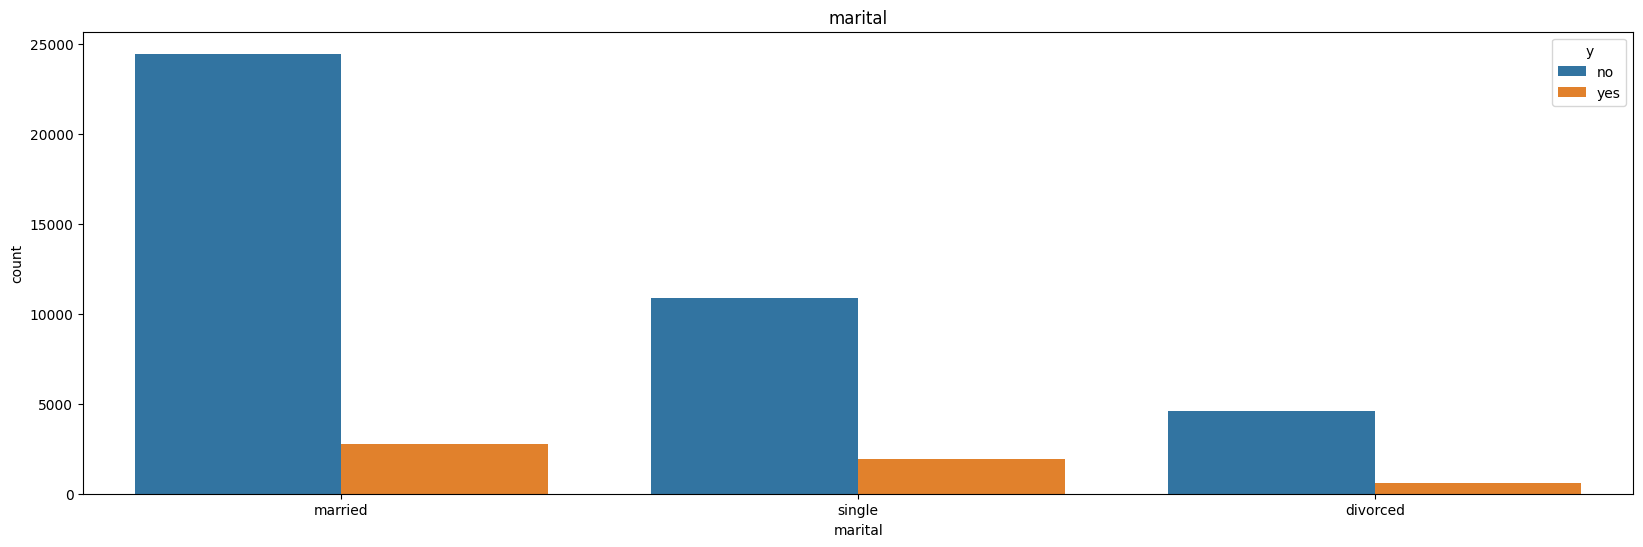

----------------------------------------------
yes rate is 
 married     0.101235
single      0.149492
divorced    0.119455
Name: marital, dtype: float64


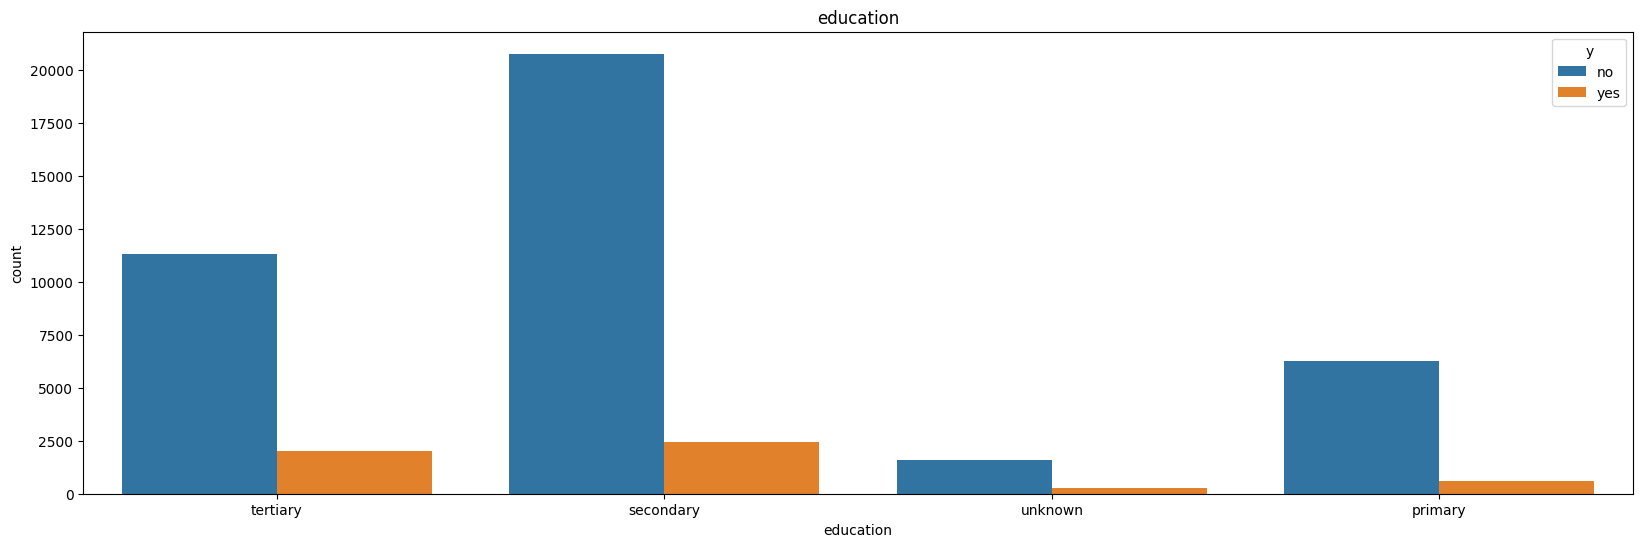

----------------------------------------------
yes rate is 
 secondary    0.105594
tertiary     0.150064
primary      0.086265
unknown      0.135703
Name: education, dtype: float64


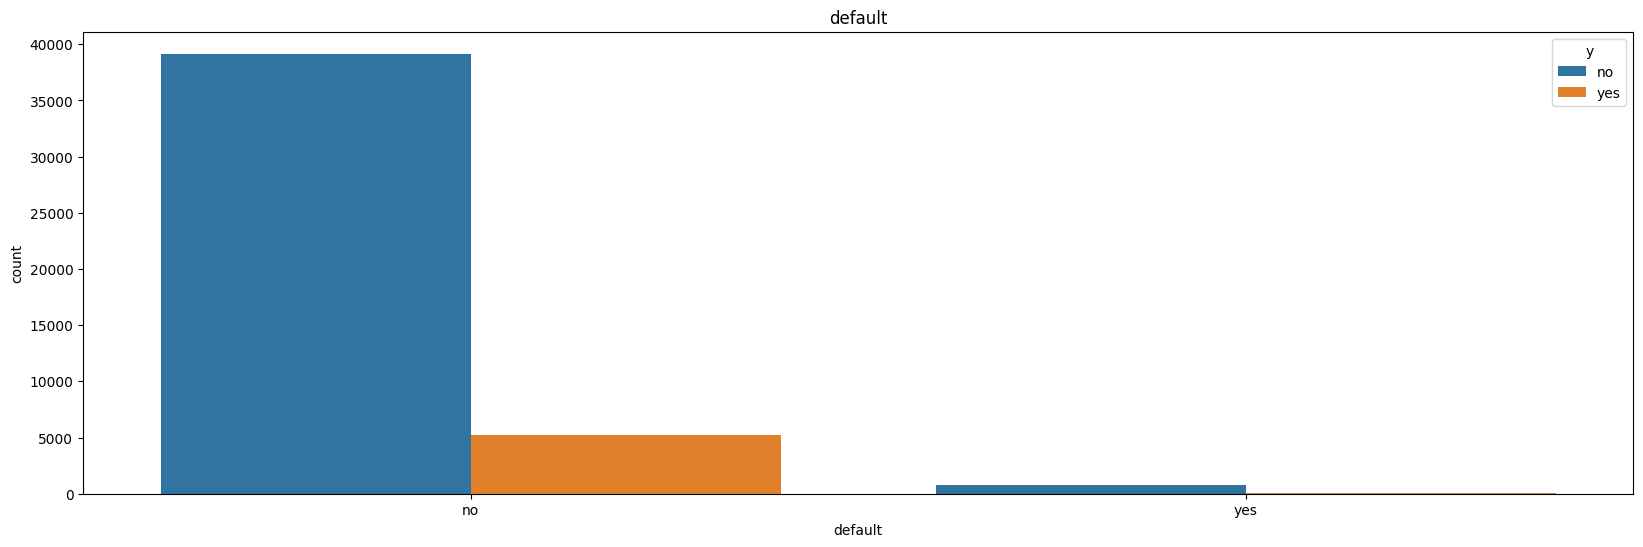

----------------------------------------------
yes rate is 
 no     0.117961
yes    0.063804
Name: default, dtype: float64


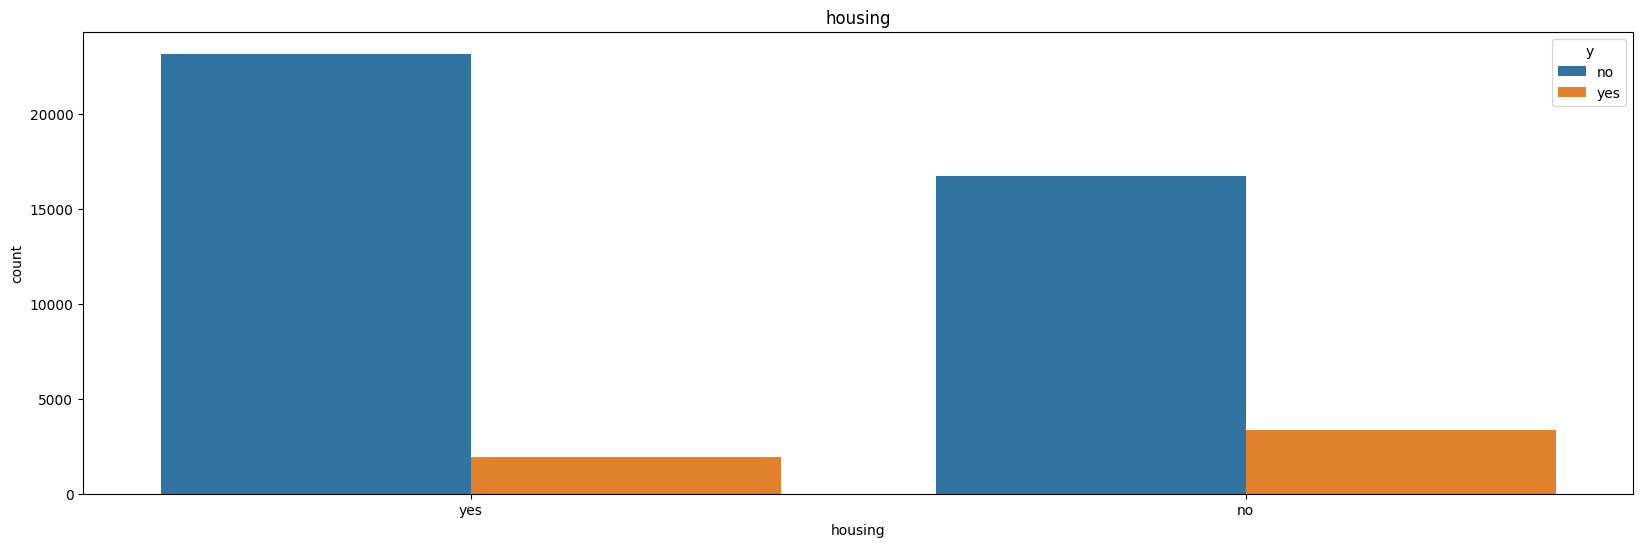

----------------------------------------------
yes rate is 
 no     0.167024
yes    0.077000
Name: housing, dtype: float64


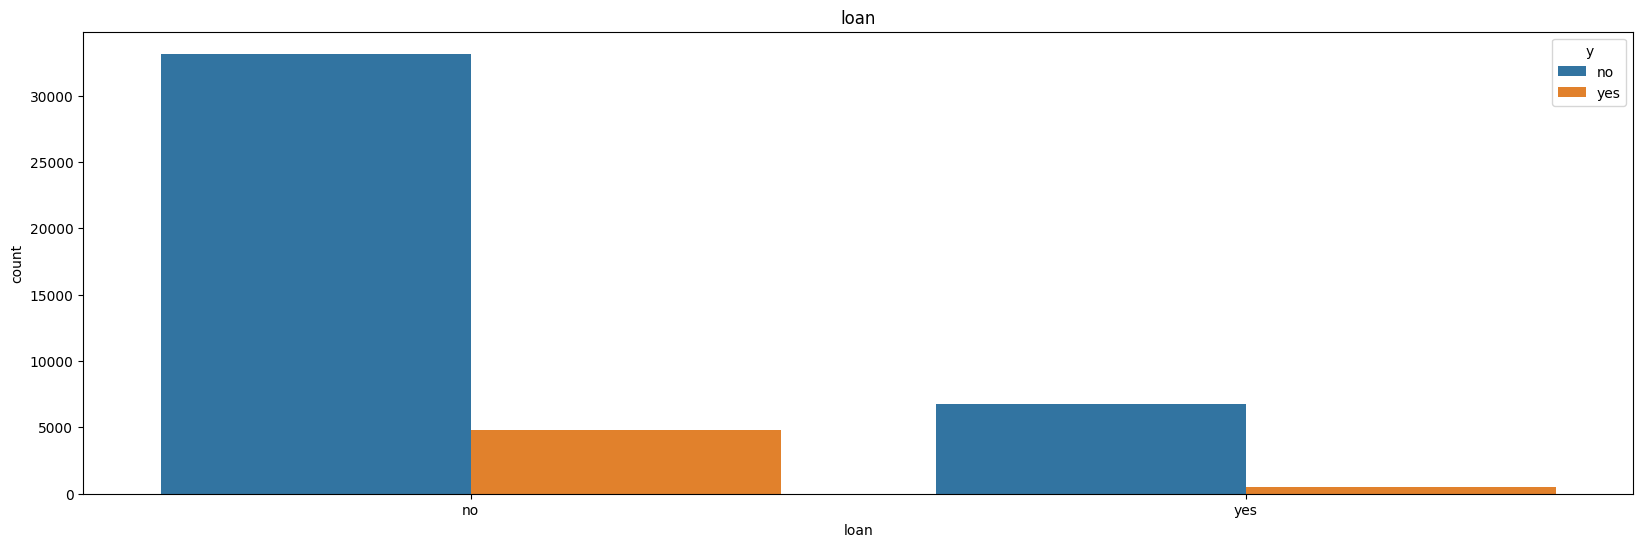

----------------------------------------------
yes rate is 
 no     0.126557
yes    0.066814
Name: loan, dtype: float64


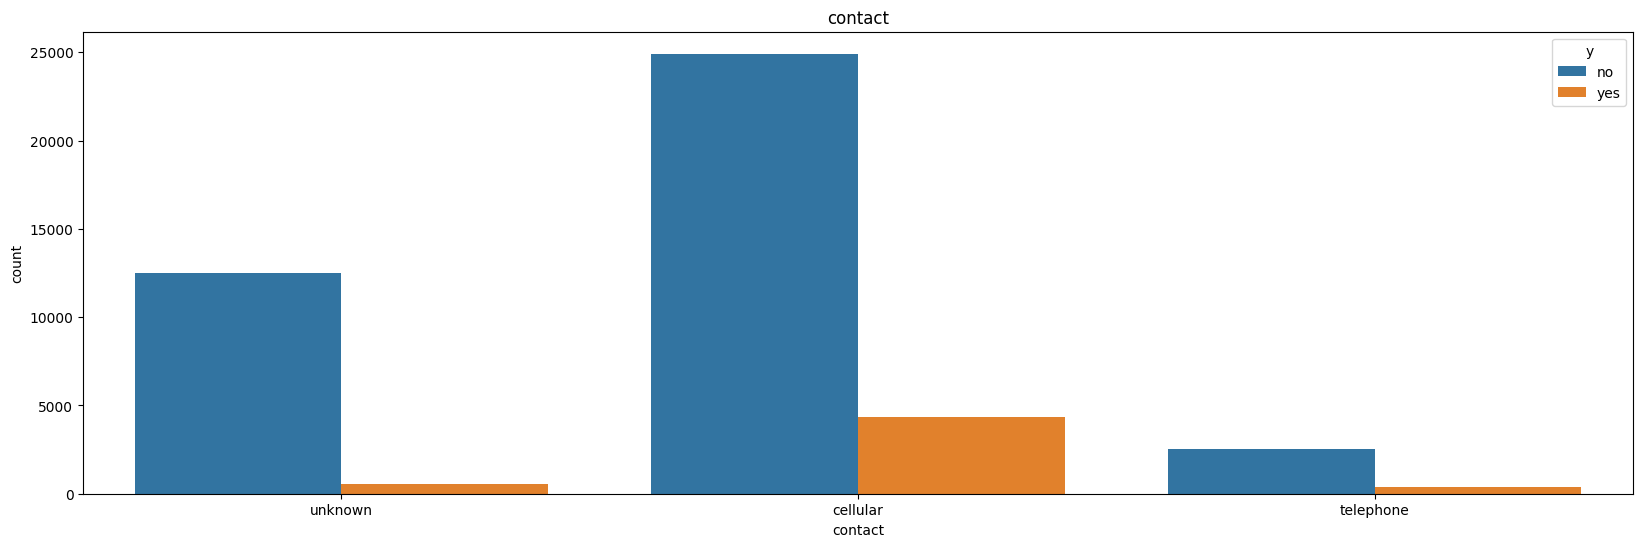

----------------------------------------------
yes rate is 
 cellular     0.149189
unknown      0.040707
telephone    0.134205
Name: contact, dtype: float64


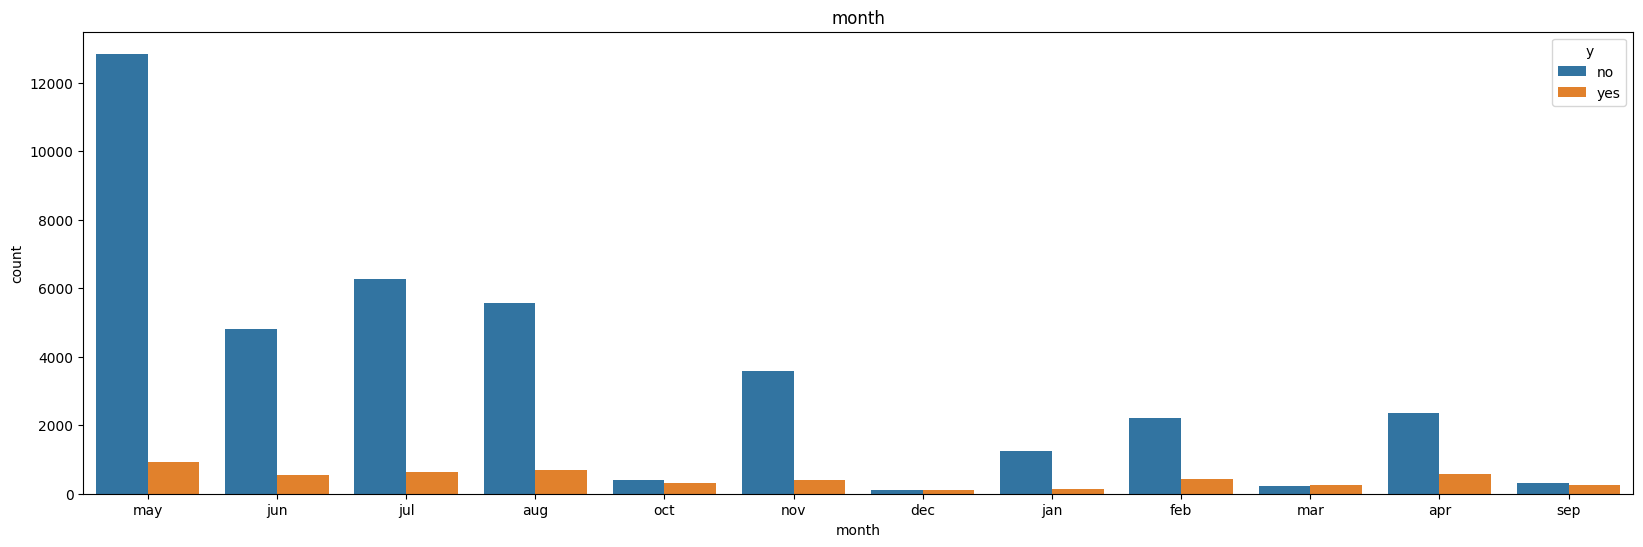

----------------------------------------------
yes rate is 
 apr    0.196794
aug    0.110133
dec    0.467290
feb    0.166478
jan    0.101212
jul    0.090935
jun    0.102228
mar    0.519916
may    0.067195
nov    0.101511
oct    0.437669
sep    0.464594
Name: month, dtype: float64


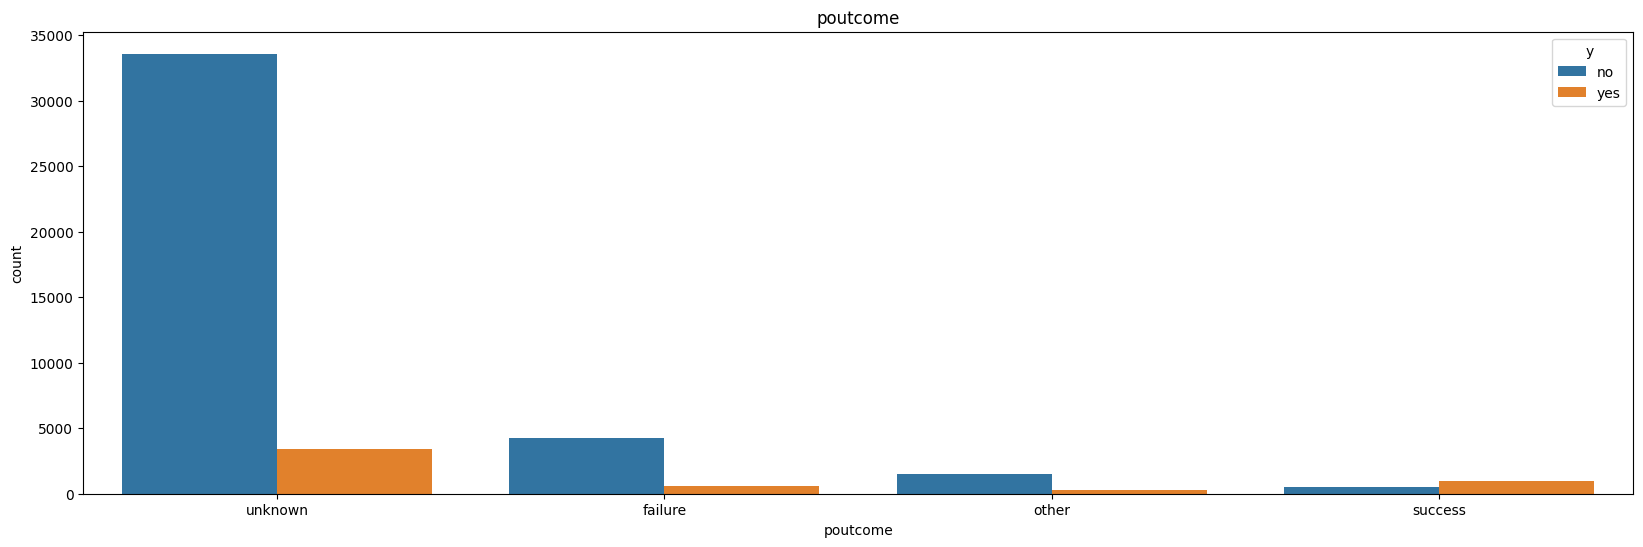

----------------------------------------------
yes rate is 
 failure    0.126097
other      0.166848
success    0.647253
unknown    0.091615
Name: poutcome, dtype: float64


In [134]:

for i in range(len(Cat_df.columns)-1):
    plt.figure(figsize=(20, 6))
    plt.title(str(Cat_df.columns[i]))
    sns.countplot(x = Cat_df[Cat_df.columns[i]],hue="y",data =df)
    plt.show()
    # print('columns ' + str(Cat_df.columns[i] + ' is ' + str(Cat_df[Cat_df.columns[i]].value_counts())))
    
    print('----------------------------------------------')
    print("yes rate is \n "+ str(Cat_df[Cat_df.columns[i]][df['y'] == 'yes'].value_counts()/Cat_df[Cat_df.columns[i]].value_counts()))


    # print(Cat_df[Cat_df.columns[i]] + 'have yes is ' + str(df[df['y'] == 'yes'][Cat_df.columns[i]].value_counts()))
 
    

# sns.barplot(df['job'].value_counts().index, df['job'].value_counts().values)
# plt.show()
# print("columns JOB have"+"\n"+str(df['job'].value_counts()))

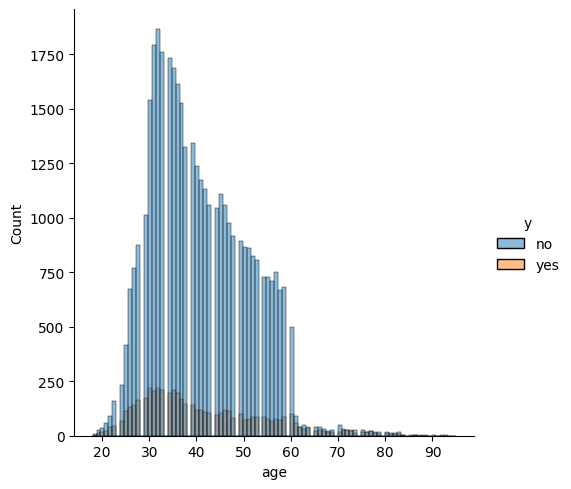

columns age have
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64


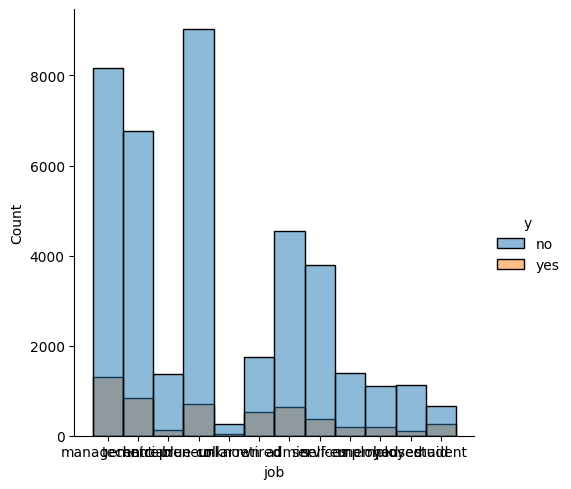

columns job have
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


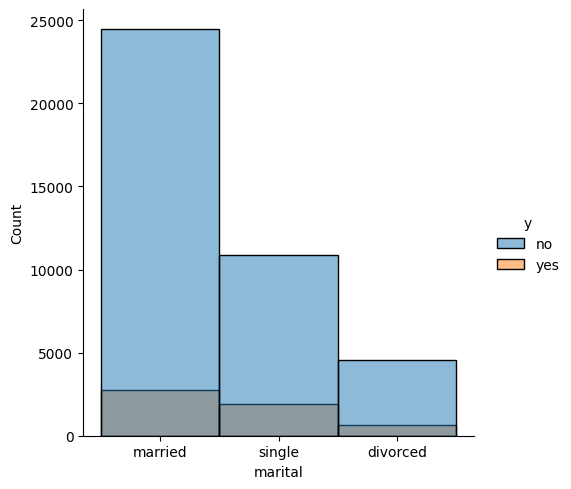

columns marital have
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


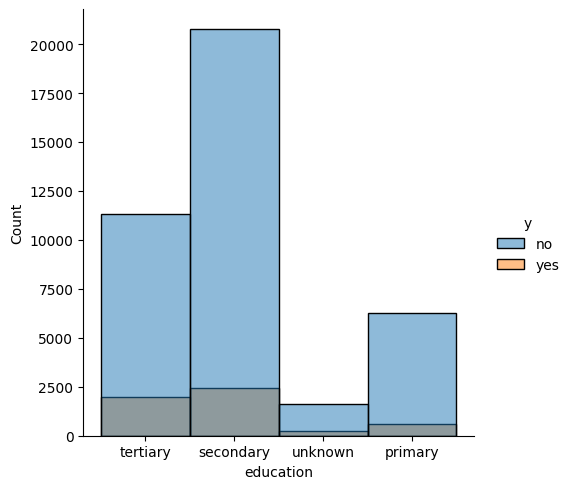

columns education have
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


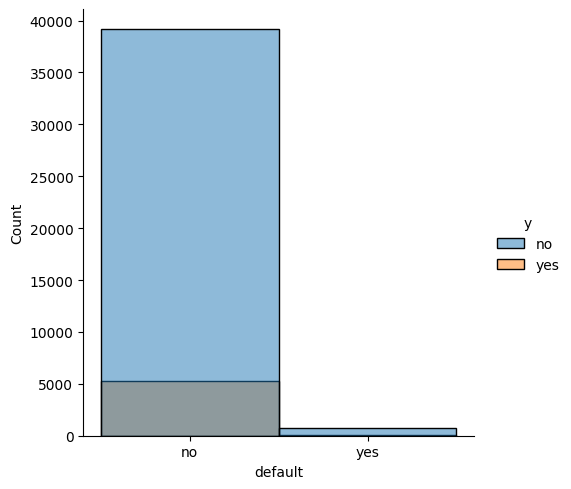

columns default have
no     44396
yes      815
Name: default, dtype: int64


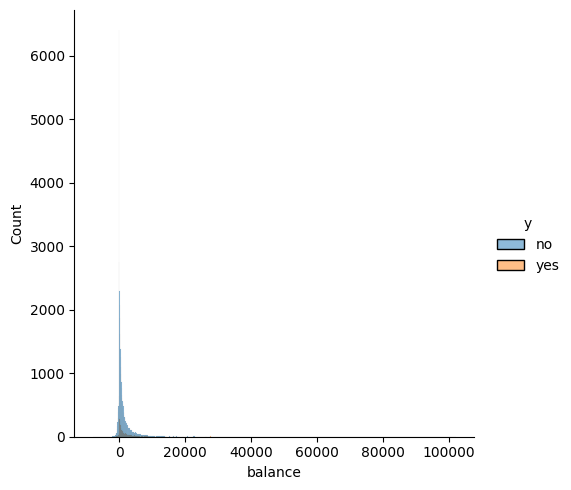

columns balance have
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64


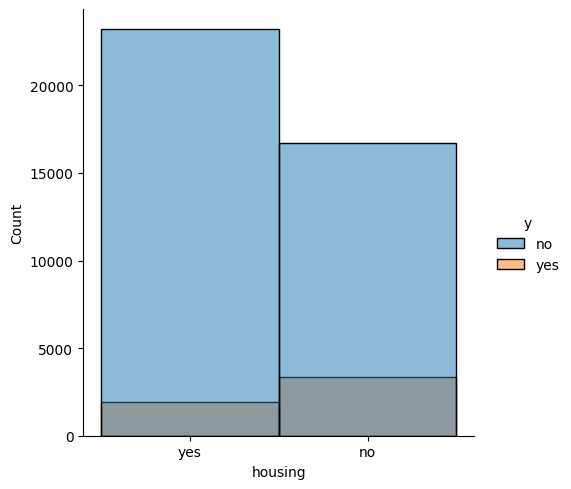

columns housing have
yes    25130
no     20081
Name: housing, dtype: int64


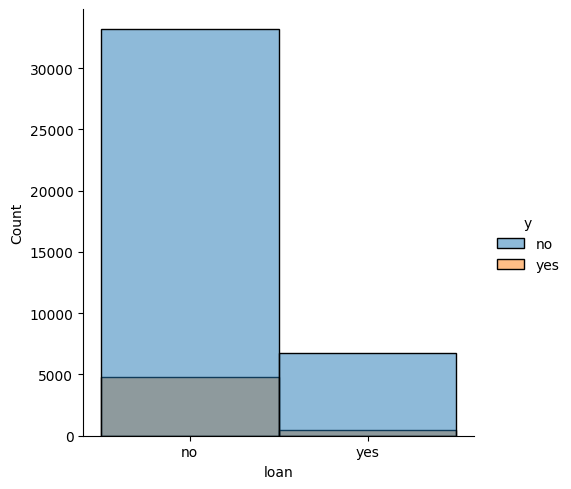

columns loan have
no     37967
yes     7244
Name: loan, dtype: int64


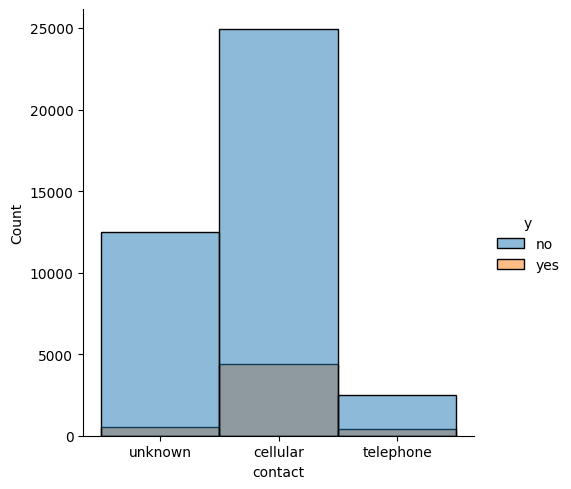

columns contact have
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


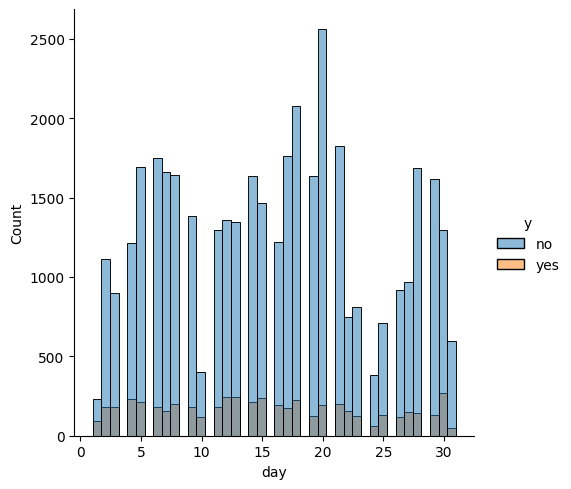

columns day have
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64


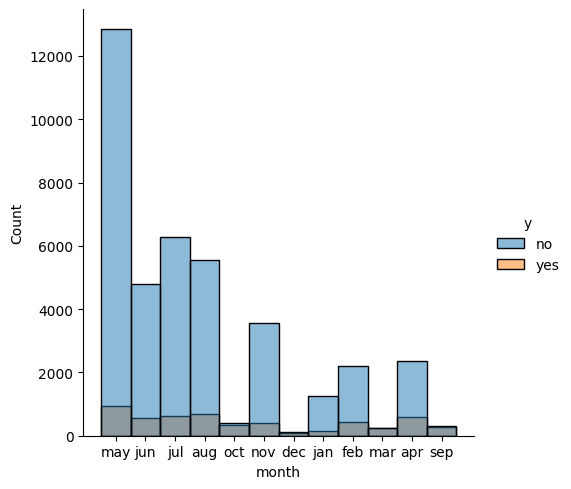

columns month have
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


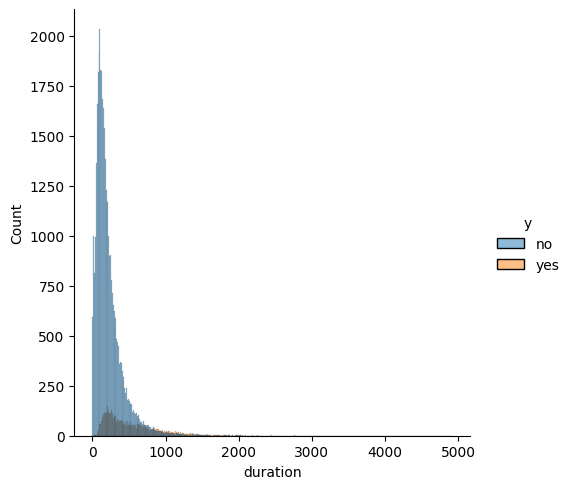

columns duration have
124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: duration, Length: 1573, dtype: int64


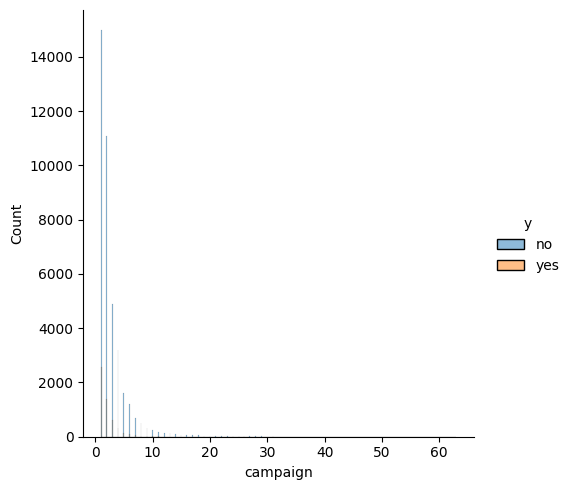

columns campaign have
1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64


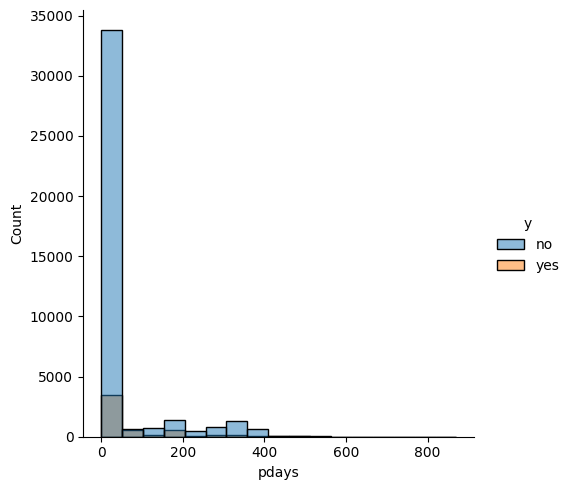

columns pdays have
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64


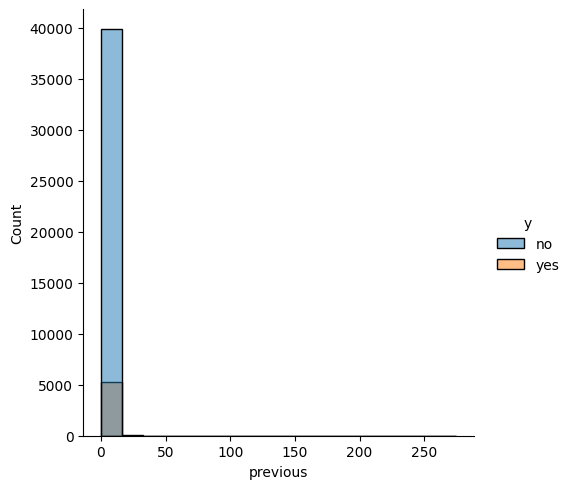

columns previous have
0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64


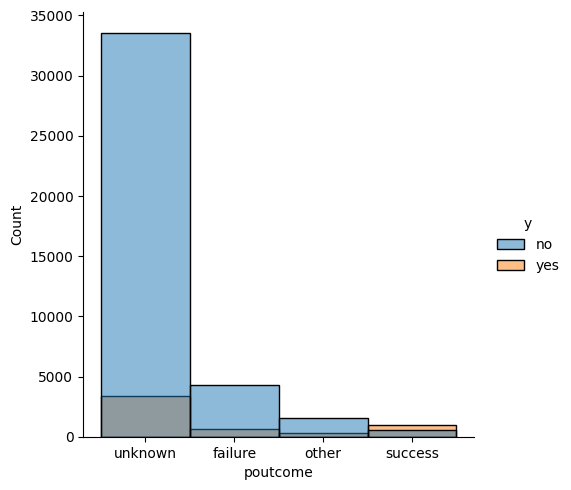

columns poutcome have
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


In [135]:
for i in range(len(df.columns)-1):
   
    sns.displot(x = df[df.columns[i]],hue="y",data =df)
    plt.show()
    print("columns "+str(df.columns[i])+" have"+"\n"+str(df[df.columns[i]].value_counts()))

ทำการเปลี่ยนค่า yes no ใน feature y เป็นค่า 1 กับ 0 เพื่อนำไปใช้เปรียบเทียบหาความสัมพันธ์กับ feature ที่เป็น numurical ตัวอื่น

In [136]:

df['y'].replace(['yes','no'],[1,0],inplace=True)
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

สร้างกราฟเพื่อดูในแต่ละ feature ที่เป็น numurical มีความสัมพันธ์กับค่า y อย่างไร

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23844\3629736107.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

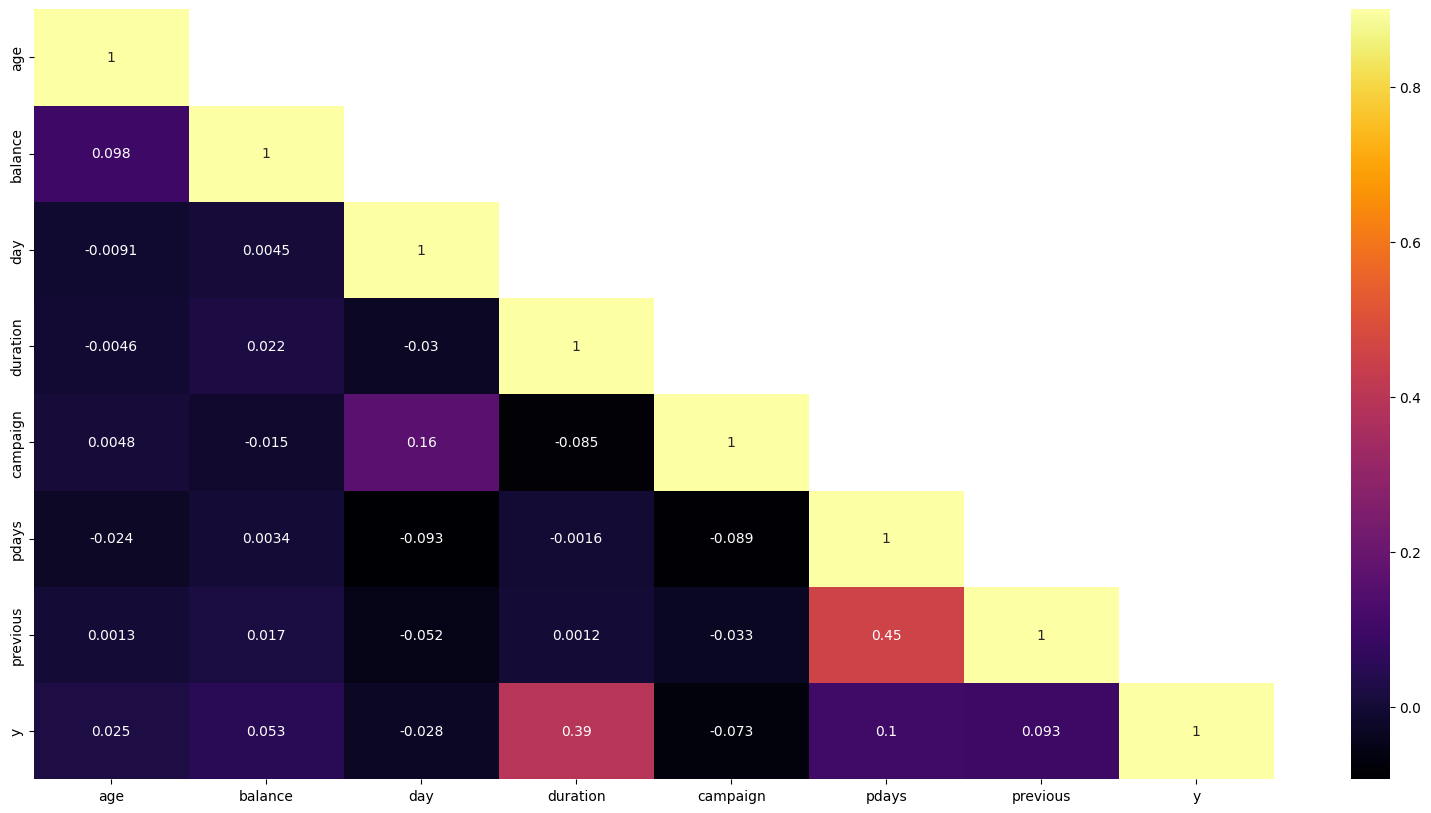

In [137]:

corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corr, mask = mask, vmax = .9, annot = True, cmap = 'inferno')

## **2. Data Preprocessing**

จากการสำรวจข้อมูลในส่วน feature ของ catagorical เราได้เลือกตัด feature : default และ contact 

ในส่วนของ feature ของ numerical เราเลือกตัด feature : balance , day , campion และ previous เนื่องจากเป็น feature ที่มีความสัมพันธ์กับ feature output (y) น้อย 


In [138]:

#delete_num = ['balance','day','campaign','previous']
#keep_num = ['duration','pday']+[age]
#delete_cat = ['default','contact']
#keep_Cat = ['job','marital','education','housing','contact', 'month','poutcome','loan']
df_new = df.copy()
df_new = df_new.drop(['balance','day','campaign','previous','default','contact'],axis =1)


In [139]:
df_new.head()

,age,job,marital,education,housing,loan,month,duration,pdays,poutcome,y
0,58,management,married,tertiary,yes,no,may,261,-1,unknown,0
1,44,technician,single,secondary,yes,no,may,151,-1,unknown,0
2,33,entrepreneur,married,secondary,yes,yes,may,76,-1,unknown,0
3,47,blue-collar,married,unknown,yes,no,may,92,-1,unknown,0
4,33,unknown,single,unknown,no,no,may,198,-1,unknown,0


In [140]:
df_not_y = df_new.copy()
df_not_y = df_not_y.drop(['y'],axis=1)

df_onehot = pd.get_dummies(df_not_y)


In [141]:
df_onehot.head()

,age,duration,pdays,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,261,-1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,151,-1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,76,-1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,92,-1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33,198,-1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [142]:
df_onehot.columns

Index(['age', 'duration', 'pdays', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'housing_no', 'housing_yes',
       'loan_no', 'loan_yes', 'month_apr', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

ทำการตัดค่า Unknow อยู่ซึ่งเป็นค่าที่ไม่มีความหมายออก

In [143]:
df_onehot = df_onehot.drop(['poutcome_unknown','job_unknown','education_unknown'],axis=1)


In [144]:
df_onehot.head()

,age,duration,pdays,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,58,261,-1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,44,151,-1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,33,76,-1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,47,92,-1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,33,198,-1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


ทำการ normorlise ข้อมูลด้วยการ MinMaxscaler

In [145]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_onehot = pd.DataFrame(scaler.fit_transform(df_onehot))



## **3. Model Construction and Analysis**

ทำการแบ่งข้อมูลสำหรับ train และ test เป็น 80 ต่อ 20

In [146]:
#Data preparation
from sklearn.model_selection import train_test_split
#x = one_hot.loc[:,one_hot.columns != 'Attrition_Flag_Existing Customer' ].values
x = df_onehot
y = df_new['y'].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [147]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (36168, 39)
y_train shape (36168,)
x_test shape (9043, 39)
y_test shape (9043,)


### 1. train modle ด้วย DecisionTree

In [148]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion='entropy',)
model_DecisionTree 

DecisionTreeClassifier(criterion='entropy')

In [149]:
model_DecisionTree.fit(x_train, y_train)
print('Accuracy of trainning set:{:.2f}'.format(model_DecisionTree.score(x_train, y_train)))
print('Accuracy of testing set:{:.2f}'.format(model_DecisionTree.score(x_test, y_test)))

Accuracy of trainning set:1.00
Accuracy of testing set:0.86


In [150]:
# #Vitualization
# from sklearn.tree import export_text
# from sklearn.tree import plot_tree
# from sklearn.tree import export_graphviz

# print(export_text(model_DecisionTree,feature_names=list(x_train.columns)))
# plt.figure(figsize=(20,10))
# plot_tree(model_DecisionTree,class_names=['0','1'],feature_names=list(x_train.columns),filled=True)
# plt.show()

In [151]:
#Predict on training set
y_pred = model_DecisionTree.predict(x_train)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_train, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31942
           1       1.00      1.00      1.00      4226

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168

Confusion matrix 
[[31942     0]
 [    4  4222]]


In [152]:
#Predict on training set
y_pred = model_DecisionTree.predict(x_test)

# Classification report

print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      7980
           1       0.43      0.45      0.44      1063

    accuracy                           0.86      9043
   macro avg       0.68      0.68      0.68      9043
weighted avg       0.87      0.86      0.87      9043

Confusion matrix 
[[7344  636]
 [ 587  476]]


    จะสังเกตุได้ว่า โมเดลที่ได้จากการทำ DecisionTree เกิดการ overfitting ซึ่งเป็นโมเดลที่มีการเรียนรู้ที่ไม่ดี เราจึงเปลี่ยนมาใช้เป็นการ train modle ด้วย Randomforest เพื่อแก้ปัญหาการ overfitting

--------------------------------------------------------------------------------------

### train modle ด้วย Randomforest

ใช้ Gridsearch ในการ tuning ค่า max_depth ไม่ให้มากเกินไป เพื่อป้องกันปัญหา overfitting และค่า n_estimators ที่เหมาะสมกับข้อมูล

In [153]:
from sklearn.ensemble import RandomForestClassifier
perf_acc = []
perf_precis = []
perf_recall = []
perf_f1 = []
#Gridserach
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 250, 500],
                'max_depth': [15,20,25]}


In [154]:

grid_search = GridSearchCV(RandomForestClassifier(), param_grid)
grid_search.fit(x_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'max_depth': 15, 'n_estimators': 250}
Best cross-validation score: 0.90


In [155]:
model_RandomForest  = RandomForestClassifier( n_estimators=500,  max_depth=15, random_state=0)

model_RandomForest

RandomForestClassifier(max_depth=15, n_estimators=500, random_state=0)

In [156]:
model_RandomForest.fit(x_train, y_train)

print('Accuracy of trainning set:{:.2f}'.format(model_RandomForest.score(x_train, y_train)))
print('Accuracy of testing set:{:.2f}'.format(model_RandomForest.score(x_test, y_test)))

Accuracy of trainning set:0.95
Accuracy of testing set:0.90


In [157]:
#Predict on training set
y_pred = model_RandomForest.predict(x_train)

# Classification report

print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_train, y_pred=y_pred))




Classification report 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     31942
           1       0.97      0.60      0.74      4226

    accuracy                           0.95     36168
   macro avg       0.96      0.80      0.86     36168
weighted avg       0.95      0.95      0.95     36168

Confusion matrix 
[[31863    79]
 [ 1684  2542]]


<Figure size 640x480 with 0 Axes>

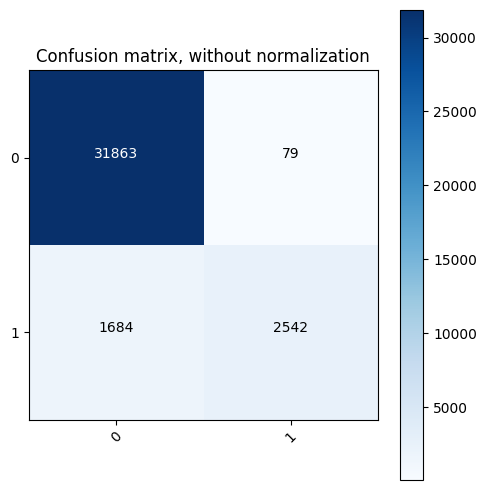

In [158]:
# Compute confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
 
  plt.figure(figsize=(5,5))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  fmt = 'd' 
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  
  
class_names = list(set(y_train))
cnf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')


In [159]:
#Predict on training set
y_pred = model_RandomForest.predict(x_test)

# Classification report

print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred))


Classification report 
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7980
           1       0.65      0.36      0.46      1063

    accuracy                           0.90      9043
   macro avg       0.78      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043

Confusion matrix 
[[7768  212]
 [ 677  386]]


percision:  [0.6454849498327759]
recall:  [0.36312323612417685]
f1 score:  [0.4647802528597231]


<Figure size 640x480 with 0 Axes>

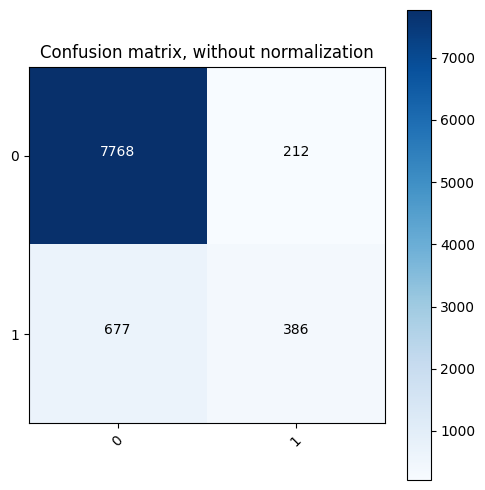

In [160]:
class_names = list(set(y_test))
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

#check performance
perf_acc.append(model_RandomForest.score(x_test, y_test))
perf_precis.append(cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[0,1]))#precision
perf_recall.append(cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))#recall
perf_f1.append(2*perf_precis[-1]*perf_recall[-1]/(perf_precis[-1]+perf_recall[-1]))#f1 score
print("percision: ",perf_precis)
print("recall: ",perf_recall)
print("f1 score: ",perf_f1)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')


------------------------------

### 2. train modle ด้วย K-Nearest Neighbors

ทำการหาค่า n_neighbors ที่ให้ค่า recall ที่สูงที่สุด 

In [161]:

from sklearn.neighbors import KNeighborsClassifier

#find best k from the best recall of 1

rate_1 = []
rate_2 = []
rate_3 = []
for k in range(1,20+1):
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(x_train, y_train)
    y_pred = model_KNN.predict(x_test)
    cnf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
    rate_1.append(cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[0][1]))#find the best precision of 1
    rate_2.append(cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[1][0]))#find the best recall of 1
    rate_3.append(2*(rate_1[-1]*rate_2[-1])/(rate_1[-1]+rate_2[-1]))#find the best f1-score of 1
print("K=1")
model_KNN = KNeighborsClassifier(n_neighbors=1)
model_KNN.fit(x_train, y_train)
print('Accuracy of trainning set:{:.2f}'.format(model_KNN.score(x_train, y_train)))
print('Accuracy of testing set:{:.2f}'.format(model_KNN.score(x_test, y_test)))

print('\n precision of 1 ')
print(rate_1)
k= rate_1.index(max(rate_1))+1 # find the best k
k2 = rate_1.index(sorted(rate_1)[-2])+1 # find the best k-1
print('The best k is',k)
print('The best precision is',max(rate_1))
print('The second k is', k2)
print('The second precision is',sorted(rate_1)[-2])

print('\n recall of 1')
print(rate_2)
k= rate_2.index(max(rate_2))+1 # find the best k
k2 = rate_2.index(sorted(rate_2)[-2])+1 # find the best k-1
print('The best k is',k)
print('The best recall is',max(rate_2))
print('The second k is', k2)
print('The second recall is',sorted(rate_2)[-2])

print('\n f1-score of 1 ')
print(rate_3)
k= rate_3.index(max(rate_3))+1 # find the best k
k2 = rate_3.index(sorted(rate_3)[-2])+1 # find the best k-1
print('The best k is',k)
print('The best f1_score is',max(rate_3))
print('The second k is', k2)
print('The second f1_score is',sorted(rate_3)[-2])

  

K=1
Accuracy of trainning set:1.00
Accuracy of testing set:0.86

 precision of 1 
[0.40232312565997885, 0.547945205479452, 0.5207986688851913, 0.5592105263157895, 0.5436681222707423, 0.5806451612903226, 0.5761421319796954, 0.6181102362204725, 0.5848484848484848, 0.6096491228070176, 0.6068965517241379, 0.6570048309178744, 0.6334661354581673, 0.6524064171122995, 0.64, 0.6724137931034483, 0.6303317535545023, 0.650887573964497, 0.6262626262626263, 0.6184971098265896]
The best k is 16
The best precision is 0.6724137931034483
The second k is 12
The second precision is 0.6570048309178744

 recall of 1
[0.3584195672624647, 0.15051740357478832, 0.2944496707431797, 0.1599247412982126, 0.23424270931326435, 0.1523988711194732, 0.21354656632173094, 0.14769520225776106, 0.18156161806208843, 0.13076199435559738, 0.16556914393226718, 0.1279397930385701, 0.1495766698024459, 0.1147695202257761, 0.1354656632173095, 0.11006585136406397, 0.1251175917215428, 0.10348071495766697, 0.11665098777046096, 0.10065

In [162]:
#n_neighbors = 3
model_KNN = KNeighborsClassifier(n_neighbors=3)
model_KNN

KNeighborsClassifier(n_neighbors=3)

In [163]:
model_KNN.fit(x_train, y_train)
print('Accuracy of trainning set:{:.2f}'.format(model_KNN.score(x_train, y_train)))
print('Accuracy of testing set:{:.2f}'.format(model_KNN.score(x_test, y_test)))
# model_RandomForest.fit(x_train, y_train)
# print('Accuracy of trainning set:{:.2f}'.format(model_RandomForest.score(x_train, y_train)))
# print('Accuracy of testing set:{:.2f}'.format(model_RandomForest.score(x_test, y_test))) 

Accuracy of trainning set:0.93
Accuracy of testing set:0.89


In [164]:
#Predict on training set
y_pred = model_KNN.predict(x_train)

# Classification report

print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_train, y_pred=y_pred))


Classification report 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     31942
           1       0.79      0.49      0.61      4226

    accuracy                           0.93     36168
   macro avg       0.86      0.74      0.78     36168
weighted avg       0.92      0.93      0.92     36168

Confusion matrix 
[[31397   545]
 [ 2135  2091]]


<Figure size 640x480 with 0 Axes>

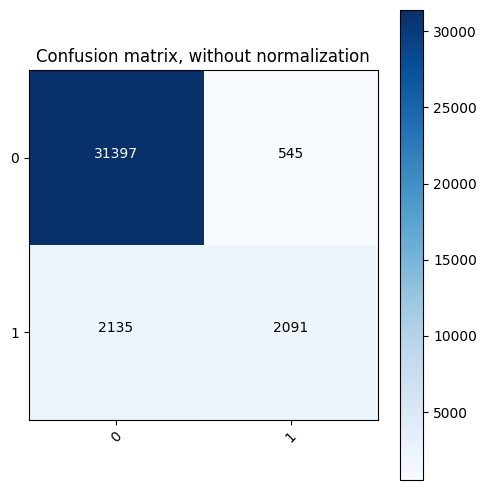

In [165]:
class_names = list(set(y_train))
cnf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

In [166]:
#Predict on training set
y_pred = model_KNN.predict(x_test)

# Classification report

print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred))


Classification report 
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7980
           1       0.52      0.29      0.38      1063

    accuracy                           0.89      9043
   macro avg       0.72      0.63      0.66      9043
weighted avg       0.87      0.89      0.87      9043

Confusion matrix 
[[7692  288]
 [ 750  313]]


percision:  [0.6454849498327759, 0.5207986688851913]
recall:  [0.36312323612417685, 0.2944496707431797]
f1 score:  [0.4647802528597231, 0.37620192307692313]


<Figure size 640x480 with 0 Axes>

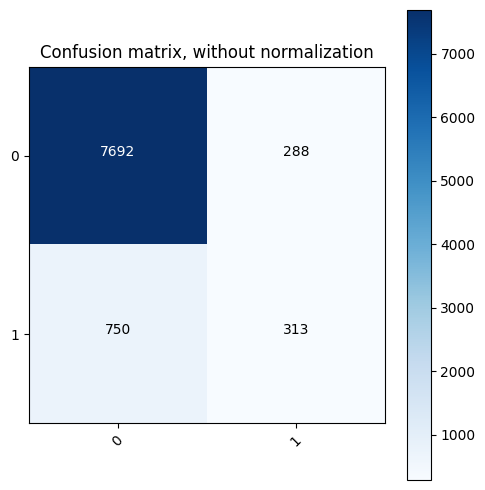

In [167]:
class_names = list(set(y_test))
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

#check performance
perf_acc.append(model_KNN.score(x_test, y_test))
perf_precis.append(cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[0,1]))#precision
perf_recall.append(cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))#recall
perf_f1.append(2*perf_precis[-1]*perf_recall[-1]/(perf_precis[-1]+perf_recall[-1]))#f1 score
print("percision: ",perf_precis)
print("recall: ",perf_recall)
print("f1 score: ",perf_f1)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

---------------------------

### 3. train modle ด้วย Neural Network

ทำการเช็ค sample ทั้งหมดหลังจาก split ที่ประกอบไปด้วย 1.train sample 2.test sample

In [168]:
# let's print the shape before we reshape and normalize
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (36168, 39)
y_train shape (36168,)
X_test shape (9043, 39)
y_test shape (9043,)


Build ตัว neural network model ด้วยตัว tensorflow และ keras โดยกำหนดให้มี hidden layer(Dense layer) ทั้งหมด 4 ชั้นดังนี้

ชั้นที่ 1 ประกอบไปด้วย 100 Neuron และใช้ตัว activation เป็น relu function ชั้นนี้จะเป็น input layer เข้ามา

ชั้นที่ 2 ประกอบไปด้วย 100 Neuron และใช้ตัว activation เป็น relu function ชั้นนี้จะเป็น hidden layer เข้ามา

ชั้นที่ 3 ประกอบไปด้วย 100 Neuron และใช้ตัว activation เป็น relu function ชั้นนี้จะเป็น hidden layer เข้ามา

ชั้นที่ 4 ประกอบไปด้วย 1 Neuron และใช้ตัว activation เป็น sigmoid function ชั้นนี้จะเป็น output layer ออก

In [169]:
#Build neural network model
from tensorflow.keras.models import Sequential        # stack the of the layer = input layer, hidden layer, output layer
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten       

#create neural  model
modelNN = Sequential()
modelNN.add(Dense(100,input_shape=(x_train.shape[1],), activation='relu'))       #(hidden and input layer) input first layer with dense # Hidden Layer (Dense(20=node tune , activation = 'relu'))
modelNN.add(Dense(100, activation='relu'))        #(hidden layer) Hidden Layer (Dense(10=node tune , activation = 'relu'))
modelNN.add(Dense(100, activation='relu'))        #(hidden layer) Hidden Layer (Dense(5=node tune , activation = 'relu'))
modelNN.add(Dense(1, activation='sigmoid'))     #(output layer) output do 2 class so use sigmoid output only 1 node but if is multiple can use show node more than 1 show = feature and use activation ='softmax or relu' 
print('Neural network model')
modelNN.summary()       # find the structure

Neural network model
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               4000      
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 24,301
Trainable params: 24,301
Non-trainable params: 0
_________________________________________________________________


เตรียม compile model ไว้หลังจากที่ทำการประกาศ layer, neuron และ activation ที่ใช้แล้วโดยจะเราคำนวนหา weight จากการใช้ optimizer ที่เป็น "sgd" และหา cost function ที่เป็น classtification ด้วย binary_crossentropy และวัด accuracy ด้วย metrics

หลังจากนั้นทำการ train neural network model ด้วย x_train, y_train และ validation แบบง่ายด้วยการไปนำ sample จาก test sample มาด้วยโดยเราจะทำการกำหนดให้ epochs ทั้งหมด 25 รอบพอเนื่องจากเรามี neuron 100 ตัวและมีทั้งหมด 3 layer ทำให้ใช้เวลานานอยู่แล้ว และกำหนดให้ update weight parameter ทุกครั้ง

In [170]:
#compile model using accuracy to measure model performance    
modelNN.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])    # use optimizer sgd = stochastic gradient descent(to find weight), consider about cost funtion with classtification = binary_crossentropy, and measure with metrics = accuracy

#train the model
historyNN = modelNN.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25 ,batch_size=1,verbose=1)    # validation_data need to split from test but teahcer lazy use test sample, epochs = round to train, batch_size = round per update weight, verbose = show visualization

Epoch 1/25
36168/36168 [==============================] - 30s 809us/step - loss: 0.2919 - accuracy: 0.8930 - val_loss: 0.2626 - val_accuracy: 0.8925
Epoch 2/25
36168/36168 [==============================] - 29s 795us/step - loss: 0.2475 - accuracy: 0.8988 - val_loss: 0.2396 - val_accuracy: 0.8956
Epoch 3/25
36168/36168 [==============================] - 29s 799us/step - loss: 0.2369 - accuracy: 0.9008 - val_loss: 0.2407 - val_accuracy: 0.8937
Epoch 4/25
36168/36168 [==============================] - 29s 792us/step - loss: 0.2319 - accuracy: 0.9032 - val_loss: 0.2427 - val_accuracy: 0.8963
Epoch 5/25
36168/36168 [==============================] - 29s 813us/step - loss: 0.2285 - accuracy: 0.9034 - val_loss: 0.2357 - val_accuracy: 0.8964
Epoch 6/25
36168/36168 [==============================] - 37s 1ms/step - loss: 0.2261 - accuracy: 0.9036 - val_loss: 0.2409 - val_accuracy: 0.8924
Epoch 7/25
36168/36168 [==============================] - 38s 1ms/step - loss: 0.2243 - accuracy: 0.9053 - v

show weight ของแต่ละชั้น layer และของแต่ละ neuron

In [171]:
#Neural network weights
print('Neural network weights')
for layer in modelNN.layers:
  print(layer.get_weights())
  print("*" *20)

Neural network weights
[array([[ 0.13127328, -0.08674043, -0.7464096 , ...,  0.00959519,
        -0.56087667,  1.6887673 ],
       [-0.11814869, -0.9324699 ,  0.71213007, ..., -0.10323838,
        -4.23881   ,  1.0942872 ],
       [-0.12989269,  0.16080923, -0.09316956, ..., -0.1087897 ,
        -0.14457999,  0.01560327],
       ...,
       [-0.1830124 , -0.14913642, -0.4657135 , ..., -0.1943629 ,
         0.10355262, -0.6046856 ],
       [ 0.15497804, -0.13531126, -0.39925933, ...,  0.35338053,
        -0.28400144, -0.86337066],
       [ 0.15130225, -0.29429176,  0.33647576, ..., -0.23058774,
        -0.14270052,  0.7707577 ]], dtype=float32), array([-0.19075613, -0.00742028,  0.03408302,  0.04214266, -0.13944809,
       -0.09884597, -0.16103458, -0.05984092, -0.10087196,  0.24430327,
        0.11441719,  0.08133882, -0.07157202, -0.10285458,  0.02772623,
       -0.01868381, -0.03504518, -0.01388929, -0.11942799,  0.03064437,
        0.04206183, -0.06128575, -0.01887603, -0.03241524, 

show loss กับ accuracy ที่ได้จากการ train epochs ทั้งหมด 25 ครั้ง

In [172]:
score1 = modelNN.evaluate(x_train, y_train, verbose=0)
print("Neural network model loss:", score1[0])
print("Neural network model Test accuracy:", score1[1])

Neural network model loss: 0.19773335754871368
Neural network model Test accuracy: 0.916030764579773


In [173]:
#Predict on training set
y_pred1 =  (modelNN.predict(x_train)>0.5).astype('int32')

1131/1131 [==============================] - 1s 594us/step


ดู performance ที่ประกอบไปด้วย precision recall f1-score ของตัว train sample

In [174]:
##Predict class 1
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report of Neural network model\n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred1))
print("Confusion matrix of Neural network model\n=======================")
print(confusion_matrix(y_true=y_train, y_pred=y_pred1))

Classification report of Neural network model
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     31942
           1       0.77      0.40      0.53      4226

    accuracy                           0.92     36168
   macro avg       0.85      0.69      0.74     36168
weighted avg       0.91      0.92      0.90     36168

Confusion matrix of Neural network model
[[31422   520]
 [ 2517  1709]]


สร้างตารางสำหรับ show ค่าการ prediction ของเรา

In [175]:
# Compute confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
  
  plt.figure(figsize=(5,5))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  fmt = 'd' 
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()

<Figure size 640x480 with 0 Axes>

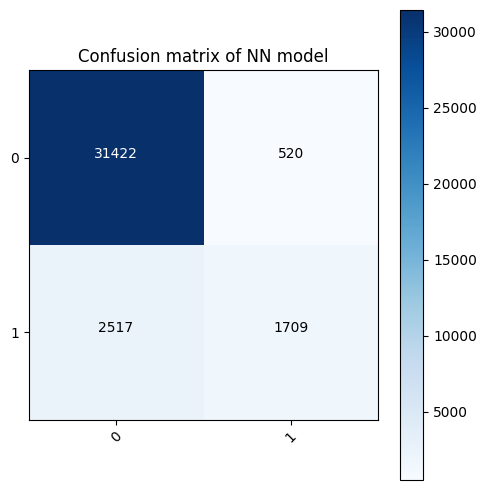

In [176]:
class_names = list(set(y_train))
#Confusion matrix of Neural network model
cnf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred1)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix of NN model')

In [177]:
#Predictions on the test set
y_pred1 =  (modelNN.predict(x_test)>0.5).astype('int32')

# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report of Neural network model\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred1))
print("Confusion matrix of Neural network model\n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred1))

283/283 [==============================] - 0s 590us/step
Classification report of Neural network model
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.63      0.34      0.44      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.65      0.69      9043
weighted avg       0.88      0.90      0.89      9043

Confusion matrix of Neural network model
[[7773  207]
 [ 706  357]]


ดู performance ที่ประกอบไปด้วย precision recall f1-score ของตัว test sample

recall:  [0.36312323612417685, 0.2944496707431797, 0.33584195672624645]
f1 score:  [0.4647802528597231, 0.37620192307692313, 0.40835337197319077]


<Figure size 640x480 with 0 Axes>

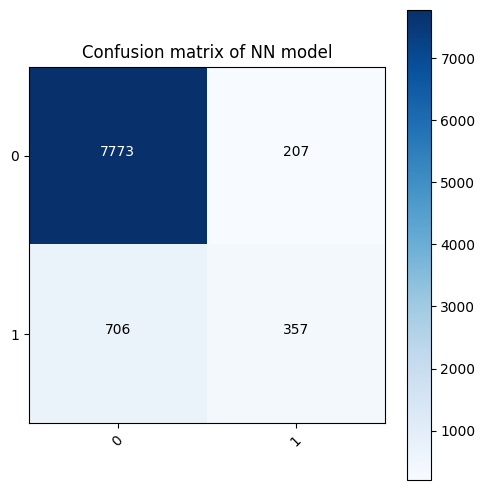

In [178]:
class_names = list(set(y_test))
#Confusion matrix of Neural network model
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred1)

#check performance

perf_recall.append(cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))#recall
perf_f1.append(2*perf_precis[-1]*perf_recall[-1]/(perf_precis[-1]+perf_recall[-1]))#f1 score

print("recall: ",perf_recall)
print("f1 score: ",perf_f1)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix of NN model')

สิ่งที่ได้จากตาราง

เราจะทราบค่า True Negative = 7773, True Positive = 357, False Negative = 706, False Positive = 207

ทำให้เราคำนวนค่าต่างๆของ Positive ได้ดังนี้

Accuracy = (TP+TN)/(TP+FN+FP+TN) = (357+7773)/(7773+357+706+207) = 8130/9043 = 0.90

Precision = TP/(TP+FP) = 357/(357+207) = 0.63

Recall = TP/(TP+FN) = 357/(357+706) = 0.34

F1-score = 2 x (Precision x Recall / Precision + Recall) = 2 x (0.63 x 0.34 / 0.63 + 0.34) = 0.44

## **สรุปผล**

[0.36312323612417685, 0.2944496707431797, 0.33584195672624645]


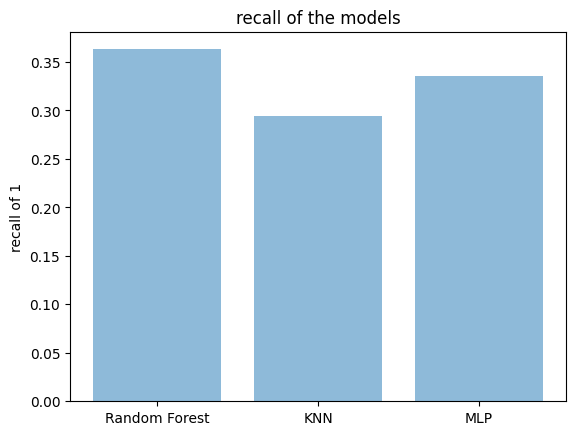

In [179]:
#bargraph of the recall of the models knn, random forest, and mlp
import matplotlib.pyplot as plt

objects = ('Random Forest', 'KNN', 'MLP')
y_pos = np.arange(len(objects))
performance = perf_recall
print(performance)
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('recall of 1')
plt.title('recall of the models')

plt.show()


[0.4647802528597231, 0.37620192307692313, 0.40835337197319077]


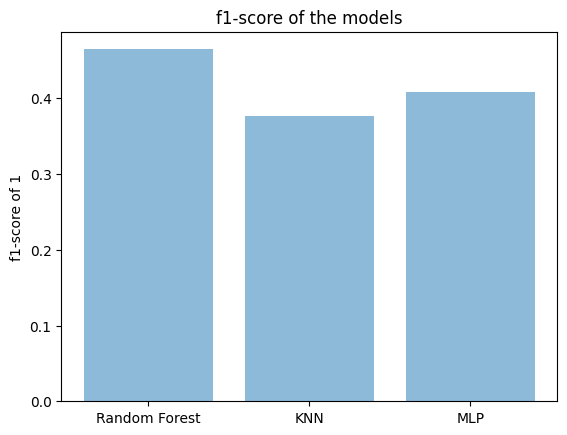

In [180]:
#bargraph of the f1-score of the models knn, random forest, and mlp
import matplotlib.pyplot as plt

objects = ('Random Forest', 'KNN', 'MLP')
y_pos = np.arange(len(objects))
performance = perf_f1
print(performance)
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('f1-score of 1')
plt.title('f1-score of the models')

plt.show()